# Bayes Theorem & Applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Bayes Theorem Formula

- P(A|B) = [ P(B|A) * P(A) ] / P(B)

- Example: Disease testing
- Prior: P(Disease) = 0.01
- Likelihood: P(Positive|Disease) = 0.9
- False Positive: P(Positive|No Disease) = 0.05


In [2]:
P_D = 0.01
P_Pos_D = 0.9
P_Pos_notD = 0.05
P_notD = 1 - P_D

# Total Probability of Positive test
P_Pos = P_Pos_D * P_D + P_Pos_notD * P_notD

# Posterior Probability: P(Disease | Positive)
P_D_Pos = (P_Pos_D * P_D) / P_Pos
print("P(Disease | Positive Test):", P_D_Pos)

P(Disease | Positive Test): 0.15384615384615385


## Multiple Hypotheses Example

- Three possible diseases A, B, C

In [3]:
priors = np.array([0.2, 0.5, 0.3])
likelihoods = np.array([0.8, 0.6, 0.4])
evidence = np.sum(priors * likelihoods)
posteriors = (priors * likelihoods) / evidence
print("Posterior Probabilities:", posteriors)

Posterior Probabilities: [0.27586207 0.51724138 0.20689655]


## Bayesian Inference with Coin Flip Simulation

Posterior Mean after coin flips: 0.7692307692307693


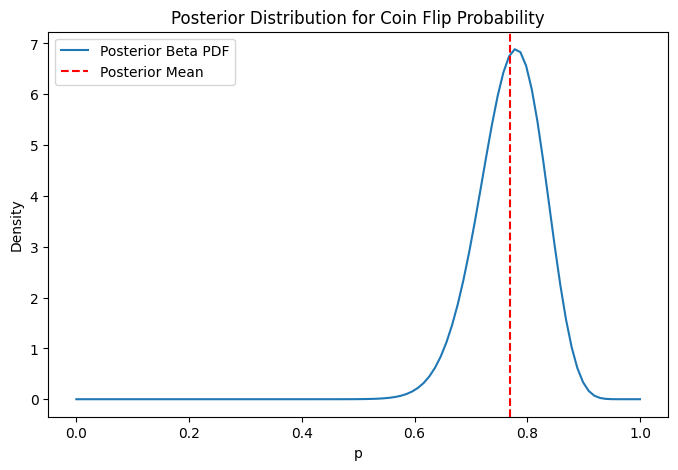

In [5]:
np.random.seed(42)
n_flips = 50
true_p = 0.7
data = np.random.binomial(1, true_p, n_flips)

# Prior: Beta(1,1) -> Uniform
alpha, beta = 1, 1
posterior_alpha, posterior_beta = alpha + np.sum(data), beta + n_flips - np.sum(data)

# Posterior Mean
posterior_mean = posterior_alpha / (posterior_alpha + posterior_beta)
print("Posterior Mean after coin flips:", posterior_mean)

# Plot Posterior Distribution
x = np.linspace(0, 1, 100)
posterior_pdf = x**(posterior_alpha-1) * (1-x)**(posterior_beta-1)
posterior_pdf /= np.trapezoid(posterior_pdf, x)

plt.figure(figsize=(8,5))
plt.plot(x, posterior_pdf, label="Posterior Beta PDF")
plt.axvline(posterior_mean, color='r', linestyle='--', label="Posterior Mean")
plt.title("Posterior Distribution for Coin Flip Probability")
plt.xlabel("p")
plt.ylabel("Density")
plt.legend()
plt.show()


## Prior Sensitivity Analysis

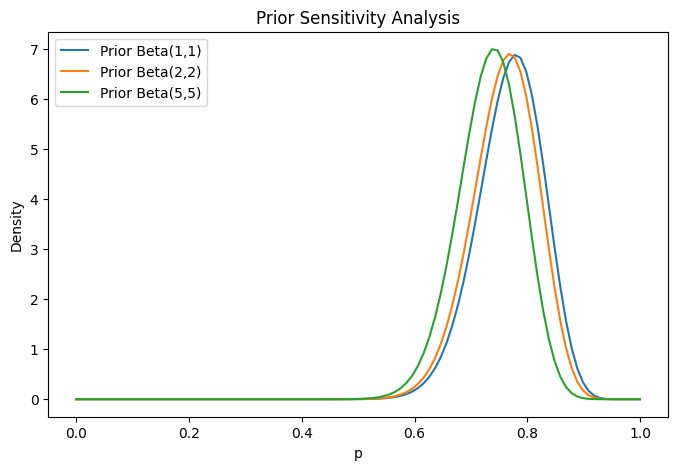

In [7]:
priors_list = [(1,1), (2,2), (5,5)]
plt.figure(figsize=(8,5))

for a,b in priors_list:
    posterior_alpha, posterior_beta = a + np.sum(data), b + n_flips - np.sum(data)
    posterior_pdf = x**(posterior_alpha-1) * (1-x)**(posterior_beta-1)
    posterior_pdf /= np.trapezoid(posterior_pdf, x)
    plt.plot(x, posterior_pdf, label=f"Prior Beta({a},{b})")

plt.title("Prior Sensitivity Analysis")
plt.xlabel("p")
plt.ylabel("Density")
plt.legend()
plt.show()